python implementation of linear regression theory -> we only need the formula and not even tool is required

In [1]:
import pandas as pd
import numpy as np

In [11]:
teams = pd.read_csv('/Users/gabrieledurante/Documents/GitHub/MLExperimentarium/linear_regr/teams.csv')

In [12]:
teams.head()

,team,year,athletes,events,age,height,weight,prev_medals,medals
0,AFG,1964,8,8,22.0,161.0,64.2,0.0,0
1,AFG,1968,5,5,23.2,170.2,70.0,0.0,0
2,AFG,1972,8,8,29.0,168.3,63.8,0.0,0
3,AFG,1980,11,11,23.6,168.4,63.2,0.0,0
4,AFG,2004,5,5,18.6,170.8,64.8,0.0,0


In [13]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014 entries, 0 to 2013
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   team         2014 non-null   object 
 1   year         2014 non-null   int64  
 2   athletes     2014 non-null   int64  
 3   events       2014 non-null   int64  
 4   age          2014 non-null   float64
 5   height       2014 non-null   float64
 6   weight       2014 non-null   float64
 7   prev_medals  2014 non-null   float64
 8   medals       2014 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 141.7+ KB


In [19]:
X = teams[['athletes', 'prev_medals']].copy()
y = teams[['medals']].copy()

In [21]:
X['intercept'] = 1

In [24]:
X = X[['intercept', 'athletes', 'prev_medals']]

In [25]:
X_T = X.T

In [30]:
B = np.linalg.inv(X_T @ X) @ X_T @ y

# X is a matrix of features
# X_T is the transpose of X
# y is a vector of target values

# np.linalg.inv() calculates the inverse of a matrix
# X_T @ X calculates the matrix product of the transpose of X and X
# The @ operator is used for matrix multiplication in Python 3.5+
# This expression results in a square matrix

# Then, the expression calculates the product of the inverse of the X_T @ X matrix
# and the transpose of X
# The resulting matrix is multiplied by the vector y

In [31]:
B

,medals
0,-1.961889
1,0.071112
2,0.734137


In [32]:
B.index = X.columns

In [29]:
B

,medals
intercept,-1.961889
athletes,0.071112
prev_medals,0.734137


In [37]:
predictions = X @ B

In [36]:
predictions

,medals
0,-1.392992
1,-1.606329
2,-1.392992
3,-1.179656
4,-1.606329
...,...
2009,-0.112974
2010,-0.966319
2011,1.378315
2012,1.614667


### r-squared calculation

**SSR**

In the context of linear regression, the sum of squared residuals (SSR) is a measure of the discrepancy between the observed values of the dependent variable and the values predicted by the regression model.

In [40]:
# sum square residuals
SSR = ((y - predictions) ** 2).sum()
SSR

medals    290620.124598
dtype: float64

**SST**

represents the total variability in the dependent variable (often denoted as Y), and it's calculated as the sum of the squared differences between each observed value of Y and the overall mean of Y.

In [41]:
# total sum square
SST = ((y - y.mean()) ** 2).sum()
SST

medals    2.276322e+06
dtype: float64

**R2**

The term "R-squared" or "R-squared coefficient" (often denoted as R2) is a statistical measure used in regression analysis to assess the goodness of fit of a regression model. It represents the proportion of the variance in the dependent variable that is predictable from the independent variables (predictors) in the model.

Mathematically, R2 is calculated as the ratio of the explained sum of squares (SSR) to the total sum of squares (SST)

In [42]:
R2 = 1 - (SSR / SST)
R2

medals    0.872329
dtype: float64

### Linear Regression using Sklearn

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
# initialize
lr = LinearRegression()

In [46]:
# fit the regerssion model to our data
lr.fit(teams[['athletes', 'prev_medals']], teams[['medals']])

# lr.fit(X, y)
# X = independet variables used for prediction
# Y = dependent variable to be predicted

LinearRegression()

In [47]:
# intercept
lr.intercept_

array([-1.96188939])

In [48]:
# coefficients
lr.coef_

array([[0.07111214, 0.73413679]])

### Visualization

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [50]:
y_true = teams['medals']
y_pred = lr.predict(teams[['athletes', 'prev_medals']])

In [53]:
# MSE
mse = mean_squared_error(y_true, y_pred)
print("MSE:", mse)

MSE: 144.29996256112923


In [54]:
# R2
r2 = r2_score(y_true, y_pred)
print("R-squared:", r2)

R-squared: 0.8723290685786969


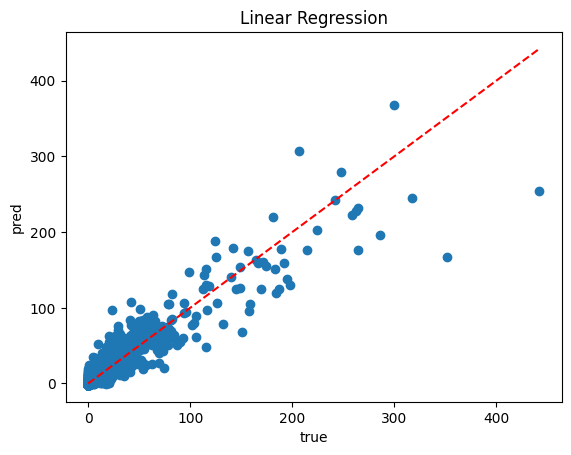

In [59]:
plt.scatter(y_true, y_pred)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], linestyle='--', color='red')

# [y_true.min(), y_true.max()]: This creates a list of two values. y_true.min() returns the minimum value in the
# y_true array, while y_true.max() returns the maximum value. These values represent the range of the actual
# values along both the x-axis and y-axis.

# [y_true.min(), y_true.max()]: This part is the same as the first argument and creates another list of two
# values representing the range of actual values. This is necessary because the plt.plot() function requires separate lists for x and y coordinates.

plt.xlabel('true')
plt.ylabel('pred')
plt.title('Linear Regression')
plt.show()

this is not the best way to do this plot. As we can later, the best way to visualise a linear regression is with a Ridge regression 